In [3]:
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from matplotlib import dates as mpl_dates
import pandas as pd
import seaborn as sns

In [5]:
data = pd.read_csv('ICAO_accidents.csv')

In [6]:
data.head()

,Unnamed: 0,Date,StateOfOccurrence,Location,Model,Registration,Operator,StateOfOperator,StateOfRegistry,FlightPhase,...,InjuryLevel,TypeDesignator,Helicopter,Airplane,Engines,EngineType,Official,OccCats,Risk,Year
0,0,"""2008-01-02T00:00:00.000Z""",PHL,Masbate Airport (MBT),NAMC YS11 A,RP-C3592,Philippines Asian Spirit,PHL,PHL,Landing,...,None,YS11,NaN,True,2,Turboprop,True,"[""RE""]",RS,2008
1,1,"""2008-01-02T00:00:00.000Z""",IRN,Tehran-Mehrabad Airport (THR),FOKKER F27 100,EP-IDB,"Iran, Islamic Republic Of Iran National Airlin...",IRN,IRN,Take-off,...,None,F27,NaN,True,2,Turboprop,True,"[""F-POST"",""ICE""]",OTH,2008
2,2,"""2008-01-03T00:00:00.000Z""",USA,Oklahoma City,PILATUS PC12,N398J,NaN,NaN,USA,Standing,...,Fatal,PC12,False,True,1,Turboprop,NaN,"[""RAMP""]",RS,2008
3,3,"""2008-01-04T00:00:00.000Z""",VEN,A 20 NM del VOR del Gran Roque,LET L410 UVP,YV2081,Venezuela,VEN,VEN,En route,...,Fatal,L410,NaN,True,2,Turboprop,True,"[""SCF-PP""]",SCF,2008
4,4,"""2008-01-05T00:00:00.000Z""",USA,Kodiak,PIPER PA31P 350,N509FN,NaN,NaN,USA,Take-off,...,Fatal,PA47,False,True,1,Jet,NaN,"[""LOC-I"",""SCF-NP""]",LOC-I,2008


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6109 entries, 0 to 6108
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           6109 non-null   int64  
 1   Date                 6109 non-null   object 
 2   StateOfOccurrence    5307 non-null   object 
 3   Location             5758 non-null   object 
 4   Model                5866 non-null   object 
 5   Registration         6109 non-null   object 
 6   Operator             4184 non-null   object 
 7   StateOfOperator      1391 non-null   object 
 8   StateOfRegistry      6107 non-null   object 
 9   FlightPhase          5175 non-null   object 
 10  Class                6109 non-null   object 
 11  Fatalities           4968 non-null   float64
 12  Over2250             6109 non-null   bool   
 13  Over5700             6085 non-null   object 
 14  ScheduledCommercial  3277 non-null   object 
 15  InjuryLevel          4154 non-null   o

### Data Prep Steps

In [8]:
##Drop Unwanted columns
data.columns

Index(['Unnamed: 0', 'Date', 'StateOfOccurrence', 'Location', 'Model',
       'Registration', 'Operator', 'StateOfOperator', 'StateOfRegistry',
       'FlightPhase', 'Class', 'Fatalities', 'Over2250', 'Over5700',
       'ScheduledCommercial', 'InjuryLevel', 'TypeDesignator', 'Helicopter',
       'Airplane', 'Engines', 'EngineType', 'Official', 'OccCats', 'Risk',
       'Year'],
      dtype='object')

In [9]:
data = data.drop(columns= ['Date','StateOfOccurrence','Location','Model',
                           'Registration','Operator','StateOfOperator','StateOfRegistry',
                           'Over2250','Over5700','Class','ScheduledCommercial','TypeDesignator',
                           'Helicopter',
                           'Airplane','Engines','EngineType','Official','OccCats'])

In [10]:
data.head()

,Unnamed: 0,FlightPhase,Fatalities,InjuryLevel,Risk,Year
0,0,Landing,0.0,None,RS,2008
1,1,Take-off,0.0,None,OTH,2008
2,2,Standing,1.0,Fatal,RS,2008
3,3,En route,14.0,Fatal,SCF,2008
4,4,Take-off,6.0,Fatal,LOC-I,2008


In [14]:
df = data.groupby(['Year']).size().reset_index(name='Total_accidents')
print(df)


    Year  Total_accidents
0   2008              732
1   2009              555
2   2010              932
3   2011              746
4   2012              274
5   2013              334
6   2014              386
7   2015              308
8   2016              433
9   2017              338
10  2018              334
11  2019              336
12  2020              188
13  2021              169
14  2022               44


<AxesSubplot:xlabel='Year', ylabel='Total_accidents'>

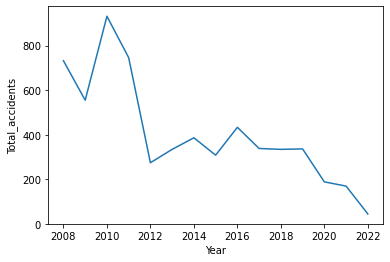

In [15]:
sns.lineplot(data=df,x=df.Year,y=df.Total_accidents)

In [16]:
newdf = df.dropna()

In [17]:
newdf.head()

,Year,Total_accidents
0,2008,732
1,2009,555
2,2010,932
3,2011,746
4,2012,274


In [42]:
len(newdf)

15

In [1]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [22]:
newdf['firstdiff'] = newdf['Total_accidents'].diff(1)

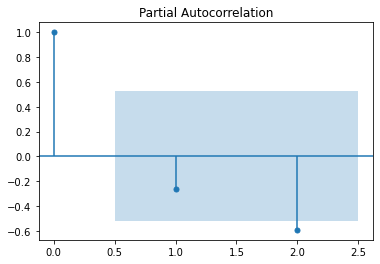

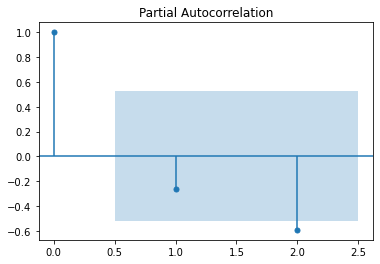

In [24]:
plot_pacf(newdf['firstdiff'].dropna(),lags=2)

In [43]:
##Split this data into a training and test set. 
##Use the last year of data (July 2020 – June 2021) of data as your test 
#set and the rest as your training set.
len(data.index)
df_train=newdf.iloc[:10]
df_test = newdf.iloc[10:]

In [44]:
##Use the model to predict the monthly retail sales on the last year of data.
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [46]:
model= SARIMAX(df_train['Total_accidents'], 
 order=(1,1,1),
 enforce_invertibility=False, enforce_stationarity=False)

In [47]:
result = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.08357D+00    |proj g|=  8.94720D-02

At iterate    5    f=  4.80021D+00    |proj g|=  2.10095D-01

At iterate   10    f=  4.70439D+00    |proj g|=  3.10118D-03


 This problem is unconstrained.



At iterate   15    f=  4.70438D+00    |proj g|=  9.35261D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     15     21      1     0     0   9.353D-06   4.704D+00
  F =   4.7043816778283993     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [48]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:        Total_accidents   No. Observations:                   10
Model:               SARIMAX(0, 1, 1)   Log Likelihood                 -47.044
Date:                Tue, 07 Feb 2023   AIC                             98.088
Time:                        20:15:26   BIC                             97.979
Sample:                             0   HQIC                            96.751
                                 - 10                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2961      0.804     -0.368      0.713      -1.872       1.280
sigma2      4.021e+04   1.45e+04      2.764      0.006    1.17e+04    6.87e+04
Ljung-Box (L1) (Q):                   0.01   Jarque-

In [50]:
final_predict = pd.DataFrame(result.predict(start=len(df_train),end = len(newdf)-1))

In [51]:
final_predict.column=['pred']

/var/folders/jd/05jr366d0jn13pfs71x7v06w0000gn/T/ipykernel_64845/297076127.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  final_predict.column=['pred']


In [52]:
final_predict

,predicted_mean
10,356.993447
11,356.993447
12,356.993447
13,356.993447
14,356.993447


In [53]:
final_data = pd.concat((final_predict,df_test),axis=1)

In [54]:
final_data.head()

,predicted_mean,Year,Total_accidents
10,356.993447,2018,334
11,356.993447,2019,336
12,356.993447,2020,188
13,356.993447,2021,169
14,356.993447,2022,44


In [56]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(final_predict['predicted_mean'].values,
                              df_test['Total_accidents'].values))

In [57]:
print(rms)

180.46309434976877


In [ ]:
## Outcome and conclusion

In [ ]:
The dataset had to go through lot of cleaning process and still the dataset 
is not a static one. and becasue of that the model outcome for RMS is pretty 
high . I believe we need to take other factors into account while building 
the model and instead of the taking the actual numbers for the year, we 
should have more breakdown of the numbers based on the monthly or daily 
data where we could have calculated the moving average and standard deviation 
and that could have given a better result.

An RMSE of 100 and more indicates that the model has a large discrepancy 
between its predictions and the actual values.

A high RMSE can indicate a few things, such as:

Overfitting: The model may have memorized the training data too well and 
is not generalizing well to new data.
Outliers: There may be some outliers in the data that are affecting the 
model's performance.


In conclusion, if the RMSE of a predictive model is 100 and more, 
it's important to analyze the causes and make adjustments to improve the 
model's performance. This may involve collecting more data, using a 
different model, or using a combination of models. The goal is to achieve
a lower RMSE that indicates a closer match between the predicted and actual 
values.
